### Запишите систему уравнений для F:

$$
x =
\left\{\begin{matrix}
1x+0y+1{x}'\Delta t + 0{y}'\Delta ty\\ 
0x+1y+0{x}'\Delta t + 1{y}'\Delta t{x}'\\ 
0x+0y+1{x}'\Delta t + 0{y}'\Delta t{y}'\\
0x+0y+0{x}'\Delta t + 1{y}'\Delta t 
\end{matrix}\right.
$$

### Преобразуем в матрицу F:

$$
F = 
\begin{bmatrix}
1 & 0 & \Delta t & 0\\ 
0 & 1 & 0 & \Delta t\\ 
0 & 0 & 1 & 0\\ 
0 & 0 & 0 & 1
\end{bmatrix}
$$

### Ковариационная матрица:

$$
Q =
\begin{bmatrix}
\sigma_{x}^{2} & \sigma_{xy} & \sigma_{x{x}'} & \sigma_{x{y}'}\\ 
\sigma_{yx} & \sigma_{y}^{2} & \sigma_{y{x}'} & \sigma_{y{y}'}\\ 
\sigma_{{x}'x} & \sigma_{{x}'x} & \sigma_{{x}'}^{2} & \sigma_{{x}'{y}'}\\ 
\sigma_{{y}'x} & \sigma_{{y}'y} & \sigma_{{y}'{x}'} & \sigma_{{x}'}^{2}
\end{bmatrix}
$$

#### Между x и y нет корреляции, поэтому мы можем приравнять к равными нулю.

$$
Q =
\begin{bmatrix}
\sigma_{x}^{2} & 0 & \sigma_{x{x}'} & 0\\ 
0 & \sigma_{y}^{2} & 0 & \sigma_{y{y}'}\\ 
\sigma_{{x}'x} & 0 & \sigma_{{x}'}^{2} & 0\\ 
0 & \sigma_{{y}'y} & 0 & \sigma_{{x}'}^{2}
\end{bmatrix}
$$

$$
\begin{bmatrix}
1 & 0 & 0 & 0\\ 
0 & 1 & 0 & 0
\end{bmatrix}
\begin{bmatrix}
x\\ 
y\\ 
{x}'\\ 
{y}'
\end{bmatrix} 
=
\begin{bmatrix}
{x}''\\ 
{y}''
\end{bmatrix}
$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from filterpy.kalman import KalmanFilter
from PosSensor import PosSensor
from filterpy.common import Q_discrete_white_noise
from plot_measurements import plot_measurements

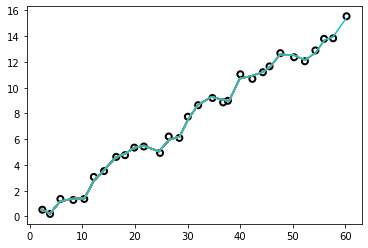

In [3]:
N = 30
dt = 1.0 
R_std = 0.5
Q_std = 0.9
M_TO_FT = 1

sensor = PosSensor((0, 0), (2, 0.5), noise_std=R_std)
zs = np.array([sensor.read() for _ in range(N)])
plot_measurements(zs[:, 0], zs[:, 1]);

tracker = KalmanFilter(dim_x=4, dim_z=2)

tracker.F = np.array([[1, 0, dt, 0],
                      [0, 1, 0, dt],
                      [0, 0, 1, 0],
                      [0, 0, 0, 1]])
tracker.H = np.array([[M_TO_FT, 0, 0, 0],
                      [0, M_TO_FT, 0, 0]])

tracker.R = np.eye(2) * R_std**2

q = Q_discrete_white_noise(dim=2, dt=dt, var=Q_std**2)
tracker.Q[0,0] = q[0,0]
tracker.Q[1,1] = q[0,0]
tracker.Q[2,2] = q[1,1]
tracker.Q[3,3] = q[1,1]
tracker.Q[0,2] = q[0,1]
tracker.Q[2,0] = q[0,1]
tracker.Q[1,3] = q[0,1]
tracker.Q[3,1] = q[0,1]

tracker.x = np.array([[0, 0, 0, 0]]).T

tracker.P = np.eye(4) * 10.


xs, ys = [], []

for z in zs:
    tracker.predict()
    tracker.update(z)
    xs.append(tracker.x[0])
    ys.append(tracker.x[1])
    plt.plot(xs, ys);
    


In [5]:
print(zs)


[[ 4.0459346  -0.23659921]
 [ 4.48904097  1.59801181]
 [ 7.20077869  0.65610264]
 [ 8.17390539  2.20461326]
 [10.64429627  0.36285986]
 [11.77028629  1.91845816]
 [14.86175242  4.17109928]
 [15.02557019  4.69145728]
 [17.62341941  3.94621192]
 [19.6153429   5.72188624]
 [21.98027829  5.01073396]
 [23.99678202  6.54999465]
 [25.57313911  7.91358125]
 [27.4678864   7.15910529]
 [29.46290021  7.11528764]
 [32.04342554  8.40432448]
 [34.45933832  8.71953617]
 [36.76018456  8.96550698]
 [37.9135235  10.40230755]
 [39.88971322 11.00053705]
 [42.40337301 10.41338875]
 [44.93904524 12.17846161]
 [45.55599316  9.98996664]
 [47.92092943 11.68402386]
 [49.86690136 12.48136693]
 [50.9265911  13.32409374]
 [54.47163514 13.20397526]
 [55.75876822 12.92140199]
 [57.08580484 14.55852869]
 [59.47627432 16.81347599]]
